1. Ulangilah tahapan klasifikasi menggunakan dataset Wine. Hitunglah akurasinya berdasar confusion matrix dan classification report dengan persentase data testing 20%, 30% dan 40%

In [12]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [13]:
wine = load_wine()
wine_data = pandas.DataFrame(wine.data)
print("Featured Name:", wine.feature_names)
print("Dataset: \n", wine_data.head())
print("Target: \n", wine.target)

Featured Name: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Dataset: 
       0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  
Target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [14]:
X, Y = wine_data.values, wine.target

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.4, random_state = 100)

classifier = DecisionTreeClassifier(random_state = 100)
classifier.fit(X_train1, Y_train1)
classifier.fit(X_train2, Y_train2)
classifier.fit(X_train3, Y_train3)

Y_pred1 = classifier.predict(X_test1)
Y_pred2 = classifier.predict(X_test2)
Y_pred3 = classifier.predict(X_test3)

print("Data test 20% : \n", Y_pred1)
print("Data test 30% : \n", Y_pred2)
print("Data test 40% : \n", Y_pred3)

Data test 20% : 
 [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1]
Data test 30% : 
 [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1]
Data test 40% : 
 [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1 2 2 0 0 1 1 0 2 0 1 1 2 1 0 0 1 0 0]


|--- feature_12 <= 760.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  760.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- class: 0



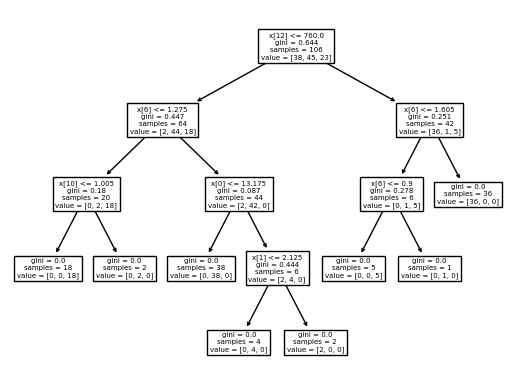

In [15]:
tree.plot_tree(classifier)
decision_tree = tree.export_text(classifier)
print(decision_tree)

In [16]:

print("--Data test 20%--")
Y_pred1 = classifier.predict(X_test1)
print("Confusion Matrix : \n", confusion_matrix(Y_test1, Y_pred1))
print(f"Accuracy : {accuracy_score(Y_test1, Y_pred1):.2f} \n")

print("--Data test 30%--")
Y_pred2 = classifier.predict(X_test2)
print("Confusion Matrix : \n", confusion_matrix(Y_test2, Y_pred2))
print(f"Accuracy : {accuracy_score(Y_test2, Y_pred2):.2f} \n")

print("--Data test 40%--")
Y_pred3 = classifier.predict(X_test3)
print("Confusion Matrix : \n", confusion_matrix(Y_test3, Y_pred3))
print(f"Accuracy : {accuracy_score(Y_test3, Y_pred3):.2f} \n")

--Data test 20%--
Confusion Matrix : 
 [[ 8  0  0]
 [ 2 11  2]
 [ 1  3  9]]
Accuracy : 0.78 

--Data test 30%--
Confusion Matrix : 
 [[14  0  0]
 [ 2 15  2]
 [ 1  4 16]]
Accuracy : 0.83 

--Data test 40%--
Confusion Matrix : 
 [[21  0  0]
 [ 3 21  2]
 [ 1  4 20]]
Accuracy : 0.86 



2. Ulangilah tahapan klasifikasi menggunakan dataset Stars. Hitunglah akurasinya berdasar confusion matrix dan classification report dengan persentase data testing 20%, 30% dan 40% 

In [17]:
df_stars = pandas.read_csv('Stars.csv')
stars_data = df_stars.iloc[:,1:5]
stars_target = df_stars.iloc[:,5]

print("Featured Name:", list(df_stars.columns))
print("Dataset: \n", stars_data.head())
print("Target: \n", stars_target.head())

Featured Name: ['Unnamed: 0', 'Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)', 'Star category']
Dataset: 
    Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)
0             3068           0.002400         0.1700                    16.12
1             3042           0.000500         0.1542                    16.60
2             2600           0.000300         0.1020                    18.70
3             2800           0.000200         0.1600                    16.65
4             1939           0.000138         0.1030                    20.06
Target: 
 0    Brown Dwarf
1    Brown Dwarf
2    Brown Dwarf
3    Brown Dwarf
4    Brown Dwarf
Name: Star category, dtype: object


In [18]:
X, Y = stars_data.values, stars_target

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.4, random_state = 100)

classifier = DecisionTreeClassifier(random_state = 100)
classifier.fit(X_train1, Y_train1)
classifier.fit(X_train2, Y_train2)
classifier.fit(X_train3, Y_train3)

Y_pred1 = classifier.predict(X_test1)
Y_pred2 = classifier.predict(X_test2)
Y_pred3 = classifier.predict(X_test3)

print("Data test 20% : \n", Y_pred1)
print("Data test 30% : \n", Y_pred2)
print("Data test 40% : \n", Y_pred3)

Data test 20% : 
 ['Hypergiant' 'White Dwarf' 'White Dwarf' 'Red Dwarf' 'White Dwarf'
 'Supergiant' 'White Dwarf' 'Supergiant' 'White Dwarf' 'Brown Dwarf'
 'Main Sequence' 'Brown Dwarf' 'Hypergiant' 'Hypergiant' 'Red Dwarf'
 'Main Sequence' 'Brown Dwarf' 'Supergiant' 'Hypergiant' 'Hypergiant'
 'White Dwarf' 'White Dwarf' 'Brown Dwarf' 'White Dwarf' 'Main Sequence'
 'Red Dwarf' 'Supergiant' 'Brown Dwarf' 'Brown Dwarf' 'Brown Dwarf'
 'Red Dwarf' 'Main Sequence' 'White Dwarf' 'Main Sequence' 'Supergiant'
 'White Dwarf' 'White Dwarf' 'Red Dwarf' 'Red Dwarf' 'Brown Dwarf'
 'Brown Dwarf' 'Supergiant' 'Main Sequence' 'Main Sequence' 'Red Dwarf'
 'Main Sequence' 'Hypergiant' 'White Dwarf']
Data test 30% : 
 ['Hypergiant' 'White Dwarf' 'White Dwarf' 'Red Dwarf' 'White Dwarf'
 'Supergiant' 'White Dwarf' 'Supergiant' 'White Dwarf' 'Brown Dwarf'
 'Main Sequence' 'Brown Dwarf' 'Hypergiant' 'Hypergiant' 'Red Dwarf'
 'Main Sequence' 'Brown Dwarf' 'Supergiant' 'Hypergiant' 'Hypergiant'
 'White Dwarf' 

|--- feature_2 <= 403.45
|   |--- feature_3 <= -4.97
|   |   |--- class: Supergiant
|   |--- feature_3 >  -4.97
|   |   |--- feature_2 <= 0.76
|   |   |   |--- feature_3 <= 15.42
|   |   |   |   |--- feature_2 <= 0.06
|   |   |   |   |   |--- class: White Dwarf
|   |   |   |   |--- feature_2 >  0.06
|   |   |   |   |   |--- class: Red Dwarf
|   |   |   |--- feature_3 >  15.42
|   |   |   |   |--- class: Brown Dwarf
|   |   |--- feature_2 >  0.76
|   |   |   |--- class: Main Sequence
|--- feature_2 >  403.45
|   |--- class: Hypergiant



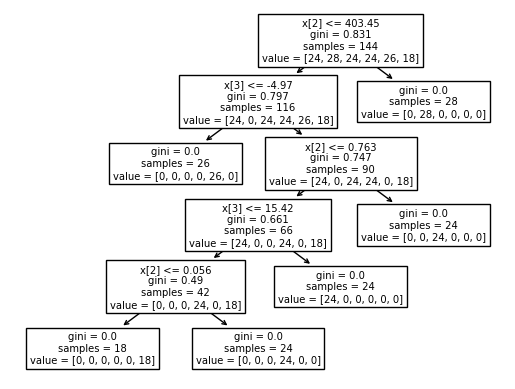

In [19]:
tree.plot_tree(classifier)
decision_tree = tree.export_text(classifier)
print(decision_tree)

In [20]:
print("--Data test 20%--")
Y_pred1 = classifier.predict(X_test1)
print("Confusion Matrix : \n", confusion_matrix(Y_test1, Y_pred1))
print(f"Accuracy : {accuracy_score(Y_test1, Y_pred1):.2f} \n")

print("--Data test 30%--")
Y_pred2 = classifier.predict(X_test2)
print("Confusion Matrix : \n", confusion_matrix(Y_test2, Y_pred2))
print(f"Accuracy : {accuracy_score(Y_test2, Y_pred2):.2f} \n")

print("--Data test 40%--")
Y_pred3 = classifier.predict(X_test3)
print("Confusion Matrix : \n", confusion_matrix(Y_test3, Y_pred3))
print(f"Accuracy : {accuracy_score(Y_test3, Y_pred3):.2f} \n")

--Data test 20%--
Confusion Matrix : 
 [[ 9  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 12]]
Accuracy : 1.00 

--Data test 30%--
Confusion Matrix : 
 [[11  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 16]]
Accuracy : 1.00 

--Data test 40%--
Confusion Matrix : 
 [[16  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 22]]
Accuracy : 1.00 



3. Ulangilah tahapan klasifikasi menggunakan dataset Breast Cancer. Hitunglah akurasinya berdasar confusion matrix dan classification report dengan persentase data testing 20%, 30% dan 40%

In [21]:
cancer = load_breast_cancer()
cancer_data = pandas.DataFrame(cancer.data)
print("Featured Name:", cancer.feature_names)
print("Dataset: \n", cancer_data.head())
print("Target: \n", cancer.target)

Featured Name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dataset: 
       0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297

In [22]:
X, Y = cancer_data.values, cancer.target

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.4, random_state = 100)

classifier = DecisionTreeClassifier(random_state = 100)
classifier.fit(X_train1, Y_train1)
classifier.fit(X_train2, Y_train2)
classifier.fit(X_train3, Y_train3)

Y_pred1 = classifier.predict(X_test1)
Y_pred2 = classifier.predict(X_test2)
Y_pred3 = classifier.predict(X_test3)

print("Data test 20% : \n", Y_pred1)
print("Data test 30% : \n", Y_pred2)
print("Data test 40% : \n", Y_pred3)

Data test 20% : 
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1]
Data test 30% : 
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1]
Data test 40% : 
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 

|--- feature_27 <= 0.14
|   |--- feature_13 <= 36.47
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.10
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: 1
|   |--- feature_13 >  36.47
|   |   |--- feature_21 <= 22.76
|   |   |   |--- class: 1
|   |   |--- feature_21 >  22.76
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- feature_23 <= 710.20
|   |   |--- feature_27 <= 0.18
|   |   |   |--- class: 1
|   |   |--- featu

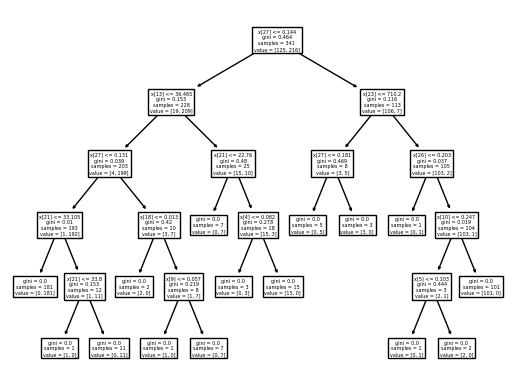

In [23]:
tree.plot_tree(classifier)
decision_tree = tree.export_text(classifier)
print(decision_tree)

In [24]:
print("--Data test 20%--")
Y_pred1 = classifier.predict(X_test1)
print("Confusion Matrix : \n", confusion_matrix(Y_test1, Y_pred1))
print(f"Accuracy : {accuracy_score(Y_test1, Y_pred1):.2f} \n")

print("--Data test 30%--")
Y_pred2 = classifier.predict(X_test2)
print("Confusion Matrix : \n", confusion_matrix(Y_test2, Y_pred2))
print(f"Accuracy : {accuracy_score(Y_test2, Y_pred2):.2f} \n")

print("--Data test 40%--")
Y_pred3 = classifier.predict(X_test3)
print("Confusion Matrix : \n", confusion_matrix(Y_test3, Y_pred3))
print(f"Accuracy : {accuracy_score(Y_test3, Y_pred3):.2f} \n")

--Data test 20%--
Confusion Matrix : 
 [[43  6]
 [ 3 62]]
Accuracy : 0.92 

--Data test 30%--
Confusion Matrix : 
 [[60  9]
 [ 5 97]]
Accuracy : 0.92 

--Data test 40%--
Confusion Matrix : 
 [[ 77  10]
 [  8 133]]
Accuracy : 0.92 

